# TODO
- dataviz

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sb
import time, sys

sys.path.append('../')

pd.options.display.max_columns = 50

In [2]:
data_path = '../data/'
train = pd.read_csv(data_path + "raw/train_30.csv", header=0, delimiter=";",decimal=',',
                    parse_dates=['date'], index_col='date')

**tH2_obs** :	Observation de la température à 2 mètres in situ- au point station (prédictant)  
**capeinsSOL0**: 	Energie potentielle convective  
**ciwcH20**: 	Fraction de glace nuageuse à 20 mètres  
**clwcH20**: 	Fraction d'eau nuageuse à 20 mètres  
**ddH10_rose4**: 	Direction du vent à 10 mètres en rose4  
**ffH10**: 	Force du vent à 10 mètres en m/s  
**flir1SOL0**: 	Flux Infra-rouge en J/m2  
**fllat1SOL0**: 	Flux de chaleur latente en J/m2  
**flsen1SOL0**: 	Flux de chaleur sensible en J/m2  
**flvis1SOL0**: 	Flux visible en J/m2  
**hcoulimSOL0**: 	Hauteur de la couche limite en mètres  
**huH2**: 	Humidité 2mètres en %  
**iwcSOL0**: 	Réservoir neige kg/m2 (équivalent en eau liquide des chutes de neige)  
**nbSOL0_HMoy**: 	Nébulosité basse (moyenne sur les 6 points de grille autour de la station) (fraction en octat du ciel occulté)  
**nH20**: 	Fraction nuageuse à 20 mètres  
**ntSOL0_HMoy**: 	Nébulosité totale (moyenne sur les 6 points de grille autour de la station)  
**pMER0**: 	Pression au niveau de la mer  
**rr1SOL0**: 	Précipitation horaire au niveau du sol  
**rrH20**: 	Précipitation horaire à 20 mètres  
**tH2**: 	Température à 2 mètres du modèle AROME  
**tH2_VGrad_2.100**: 	Gradient vertical de température entre 2 mètres et 100 mètres  
**tH2_XGrad**: 	Gradient zonal de température à 2 mètres  
**tH2_YGrad**: 	Gradient méridien de température à 2 mètres  
**tpwHPA850**: 	Température potentielle au niveau 850 hPa  
**ux1H10**: 	Rafale 1 minute du vent à 10 mètres composante zonale  
**vapcSOL0**: 	Colonne de vapeur d'eau  
**vx1H10**: 	Rafale 1 minute du vent à 10 mètres composante verticale  
**ech** : 	Echéance de validité = date   

# Converting type

In [3]:
train.insee = train.insee.astype('str')

# Rows with nan

In [4]:
# Total missings values by variable
pd.DataFrame(train.isnull().sum()).T

,insee,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ddH10_rose4,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech,mois
0,0,0,616,0,126,126,126,7,7,7,7,0,126,7,7,336,7,133,7,119,126,126,126,126,7,126,0,126,0,0


flir1SOL0 	fllat1SOL0 	flsen1SOL0 	flvis1SOL0 iwcSOL0 	nbSOL0_HMoy ntSOL0_HMoy rr1SOL0 tpwHPA850 : 7 missings  
rrH20 : 119 missings  
clwcH20 ddH10_rose4 ffH10 huH2 tH2 	tH2_VGrad_2.100 tH2_XGrad tH2_YGrad ux1H10 vx1H10 : 126 missings  
pMER0 : 133  
nH20 : 336  
capeinsSOL0 : 616 

In [9]:
for i in np.where(train.isnull().sum() == 7)[0]:
    print(np.where(np.asanyarray(pd.isnull(train.iloc[:,i]))))

(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)
(array([4627, 4628, 4629, 4630, 4631, 4632, 4633]),)


Same location for these missings vals

In [10]:
# Rows with missing val
np.where(train.isnull().sum(axis=1).values > 0)[0]

array([ 539,  540,  541,  542,  543,  544,  545,  546,  547,  548,  549,
        550,  551,  552,  553,  554,  555,  556,  557,  558,  559,  560,
        561,  562,  563,  564,  565,  566,  567,  568,  569,  570,  571,
        572,  573,  574,  575,  576,  577,  578,  579,  580,  581,  582,
        583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
        594,  595,  596,  597,  598,  599,  600,  601,  602,  603,  604,
        605,  606,  607,  608,  609,  610,  611,  612,  613,  614,  615,
        616,  617,  618,  619,  620,  621,  622,  623,  624,  625,  626,
        627,  628,  629,  812,  813,  814,  815,  816,  817,  818,  819,
        820,  821,  822,  823,  824,  825,  826,  827,  828,  829,  830,
        831,  832,  833,  834,  835,  836,  837,  838,  839, 1540, 1541,
       1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552,
       1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563,
       1564, 1565, 1566, 1567, 1568, 1569, 1570, 15

In [11]:
# Coordinate of missing values
np.where(np.asanyarray(pd.isnull(train)))

(array([ 539,  540,  541, ..., 4633, 4633, 4633]),
 array([ 2,  2,  2, ..., 24, 25, 27]))

Lets have a look to 1 row

In [12]:
pd.DataFrame(train.iloc[539+(7*11),:]).T

,insee,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ddH10_rose4,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech,mois
2014-03-30,6088001,11.3,NaN,0,0,1.0,0.559216,-319805,-39191.8,1483.23,83410.7,55.148,70.6249,0,0,0,8,1016.91,0,0,13.4265,0.373662,0.00352482,-0.00676651,8.31097,-0.378848,11.1698,-0.0692918,30,mars


### Lets see if one can interpolate the missing values

In [13]:
for i in range(1,8):
    print(train.index[539-7*i], 
          ' - capeinsSOL0 val : {} for station {}'.format(train.capeinsSOL0[539-7*i], train.insee[539-7*i]))
print('interpolate : {}'.format(train.capeinsSOL0.interpolate()[539]))

2014-03-18 00:00:00  - capeinsSOL0 val : 7.71462916159 for station 6088001
2014-03-17 00:00:00  - capeinsSOL0 val : 7.90780714985 for station 6088001
2014-03-16 00:00:00  - capeinsSOL0 val : 0.0513649447693 for station 6088001
2014-03-15 00:00:00  - capeinsSOL0 val : 0.0677757209742 for station 6088001
2014-03-14 00:00:00  - capeinsSOL0 val : 0.0111768147617 for station 6088001
2014-03-13 00:00:00  - capeinsSOL0 val : 0.000466305369627 for station 6088001
2014-03-12 00:00:00  - capeinsSOL0 val : 0.00520225202489 for station 6088001
interpolate : 5.90483128579


In [24]:
for i in range(1,25):
    print(train.capeinsSOL0[539+7*i])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.206808648014
0.0500519458001
0.201991389069
0.0249546219275
0.0984533317242
0.0
5.07420018139
0.234053969383
2.89071020736
7.7248343433
69.6666567773
8.9741141126


### Difficile d'interpoler (ici pour capeinsSOL0)

In [22]:
for i in range(1,5):
    print(train.index[4627-7*i], 
          ' - flir1SOL0 val : {} for station {}'.format(train.flir1SOL0[4627-7*i], train.insee[4627-7*i]))
print('interpolate : {}'.format(train.flir1SOL0.interpolate()[4627]))
for i in range(1,5):
    print(train.flir1SOL0[4627+7*i])

2015-10-23 00:00:00  - flir1SOL0 val : -339351.45561 for station 6088001
2015-10-22 00:00:00  - flir1SOL0 val : -335334.200187 for station 6088001
2015-10-21 00:00:00  - flir1SOL0 val : -391646.537802 for station 6088001
2015-10-20 00:00:00  - flir1SOL0 val : -370097.530793 for station 6088001
interpolate : -165042.958353
-103793.381605
-100742.319785
-82790.7855024
-344353.275807


### Ici ca marche. A explorer

### Replace na val en utilisant le groupby. Faire des stats par city

https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [42]:
groupby_city.capeinsSOL0.apply(pd.Series.interpolate)

insee     date      
31069001  2014-01-01     22.303022
          2014-01-02      0.000000
          2014-01-03      4.576111
          2014-01-04      0.000000
          2014-01-05      0.000000
          2014-01-06      0.000000
          2014-01-07      0.000000
          2014-01-08      0.000000
          2014-01-09      0.000000
          2014-01-10      0.000000
          2014-01-11      0.395456
          2014-01-12      1.680671
          2014-01-13      0.117292
          2014-01-14      0.581610
          2014-01-15     19.564641
          2014-01-16     24.623643
          2014-01-17      0.000000
          2014-01-18      4.582809
          2014-01-19      1.896430
          2014-01-20      1.699208
          2014-01-21      1.507189
          2014-01-22      7.710528
          2014-01-23     23.475732
          2014-01-24      4.539763
          2014-01-25      5.917333
          2014-01-26     34.121452
          2014-01-27     97.991203
          2014-01-28      0.048976

# Univariate analysis

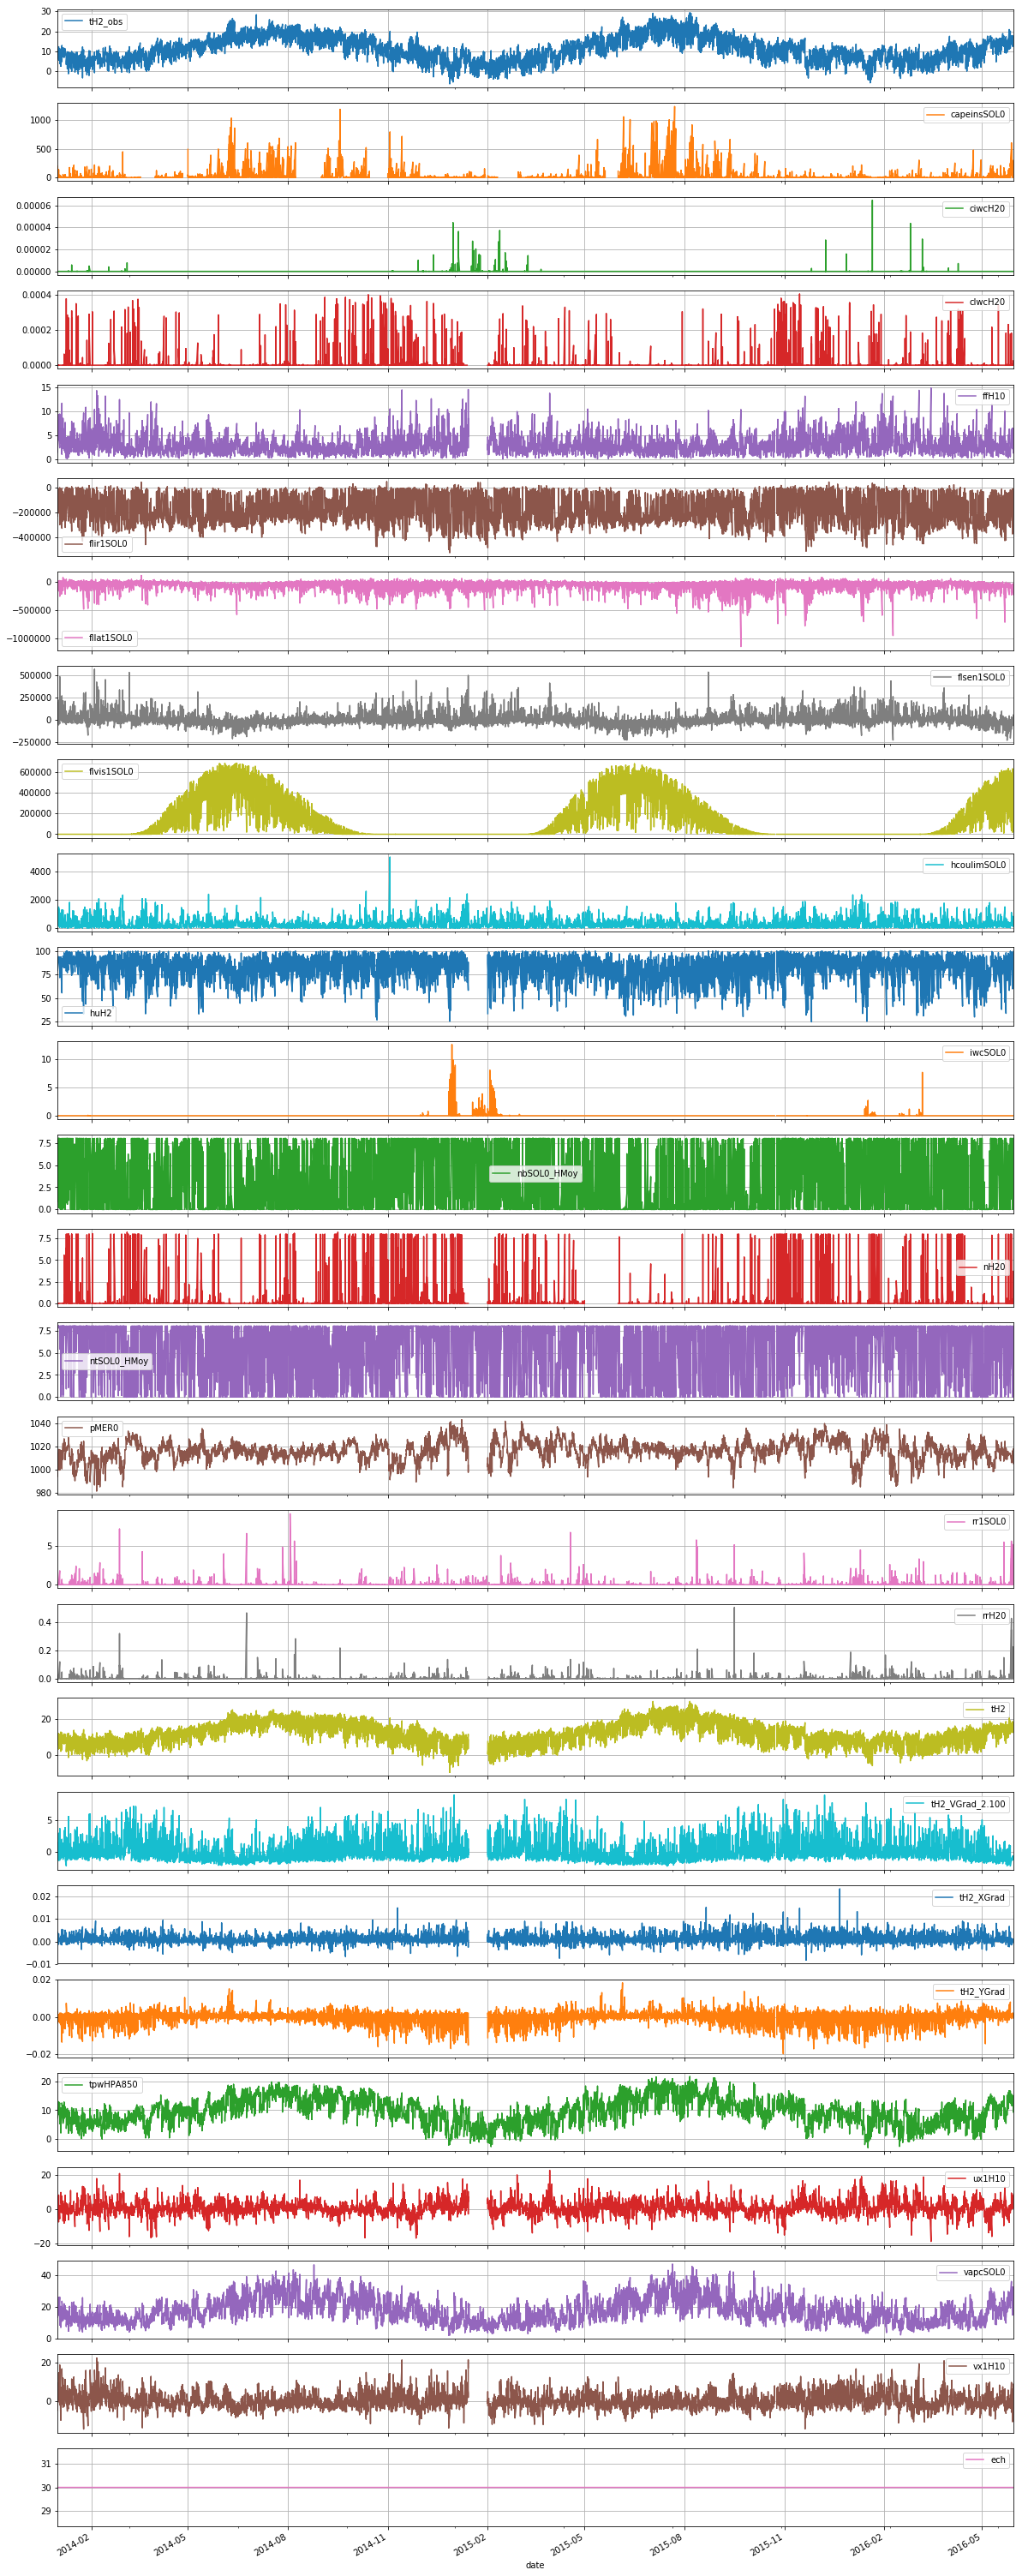

In [28]:
plt.figure()
train.plot(subplots=True, figsize=(20,60), grid=True)
plt.show()

Thats a mess, lets analyze it per week

In [5]:
train.columns.values

array(['insee', 'tH2_obs', 'capeinsSOL0', 'ciwcH20', 'clwcH20',
       'ddH10_rose4', 'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0',
       'flvis1SOL0', 'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy',
       'nH20', 'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10', 'ech', 'mois'], dtype=object)

In [6]:
var_used = ['capeinsSOL0', 'ciwcH20', 'clwcH20',
       'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0',
       'flvis1SOL0', 'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy',
       'nH20', 'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10']

## Weekly analysis

<IPython.core.display.Javascript object>


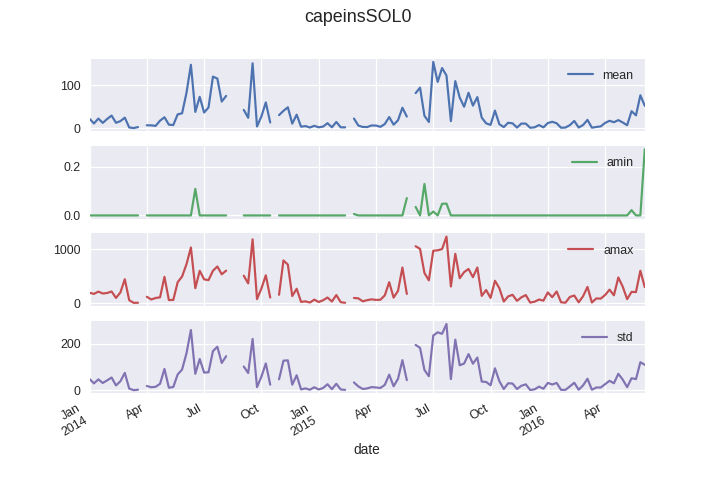

<IPython.core.display.Javascript object>


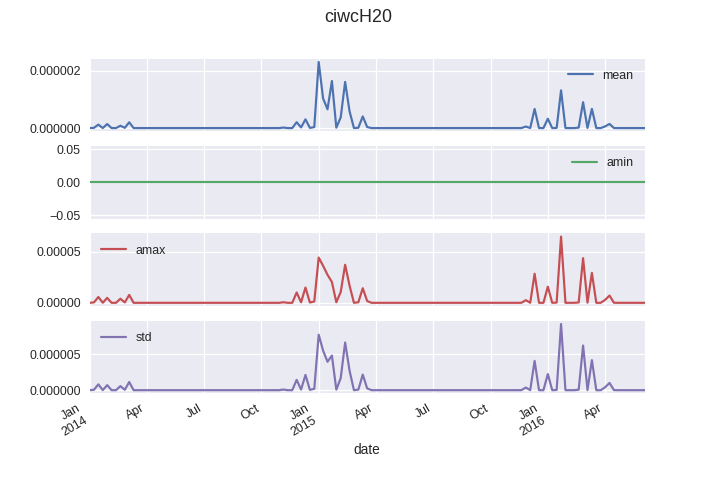

<IPython.core.display.Javascript object>


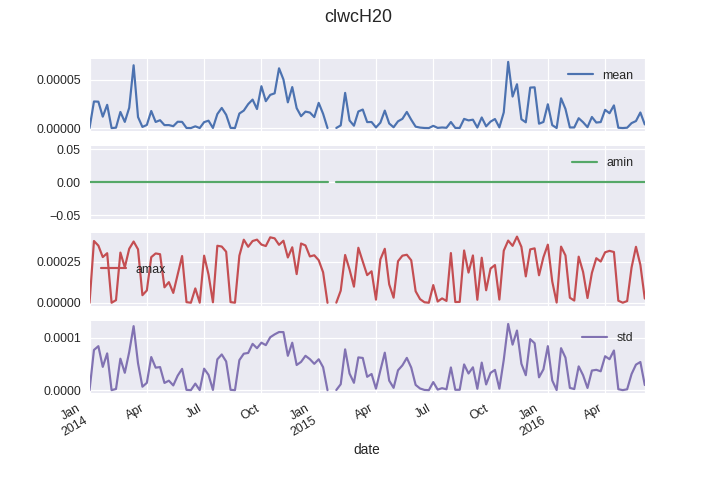

<IPython.core.display.Javascript object>


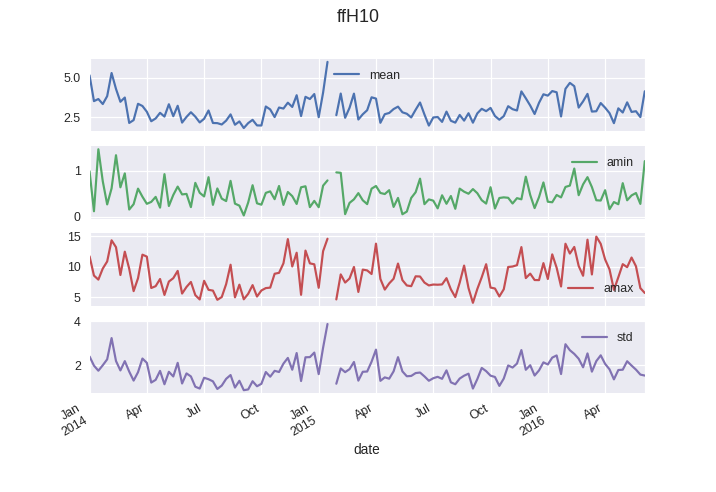

<IPython.core.display.Javascript object>


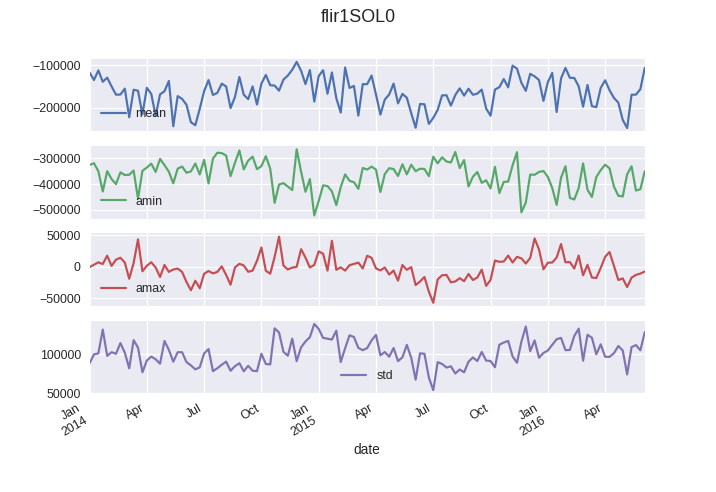

<IPython.core.display.Javascript object>


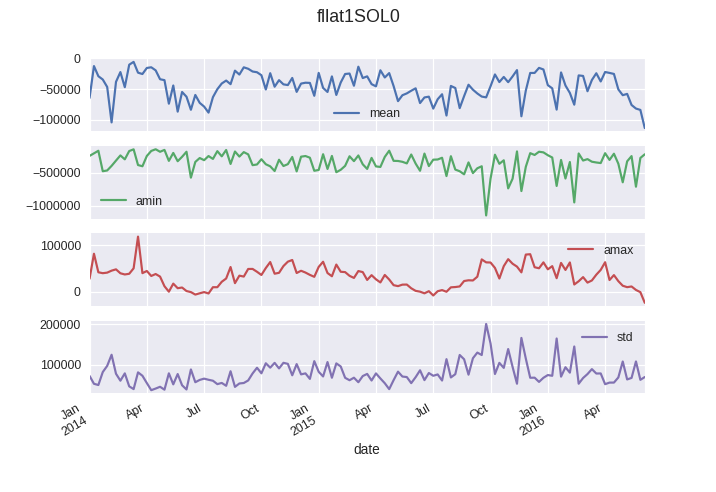

<IPython.core.display.Javascript object>


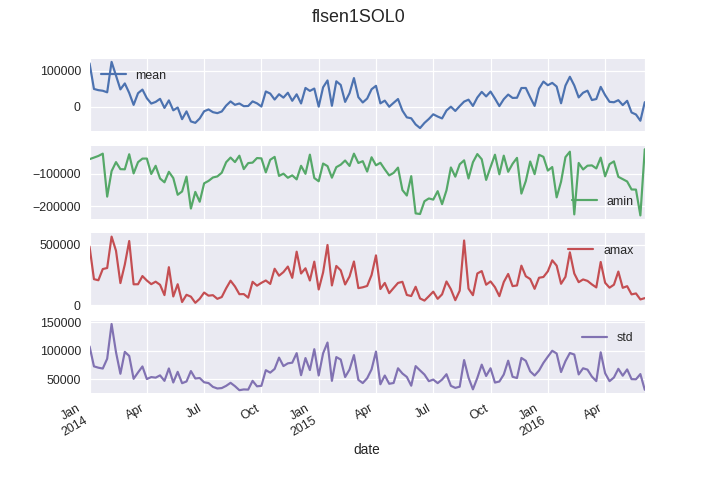

<IPython.core.display.Javascript object>


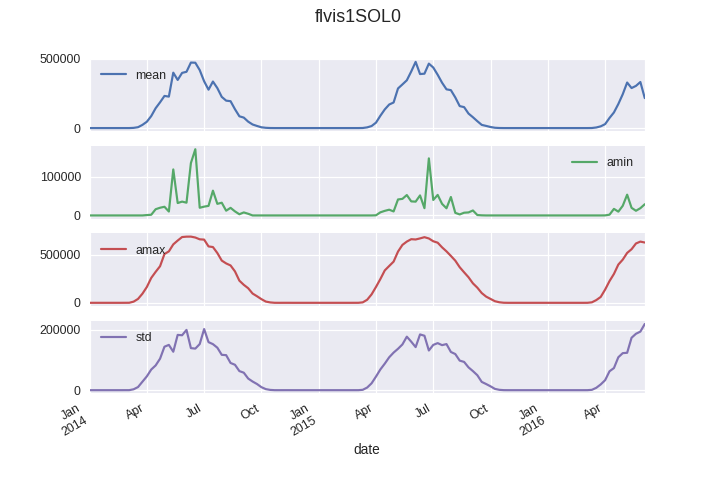

<IPython.core.display.Javascript object>


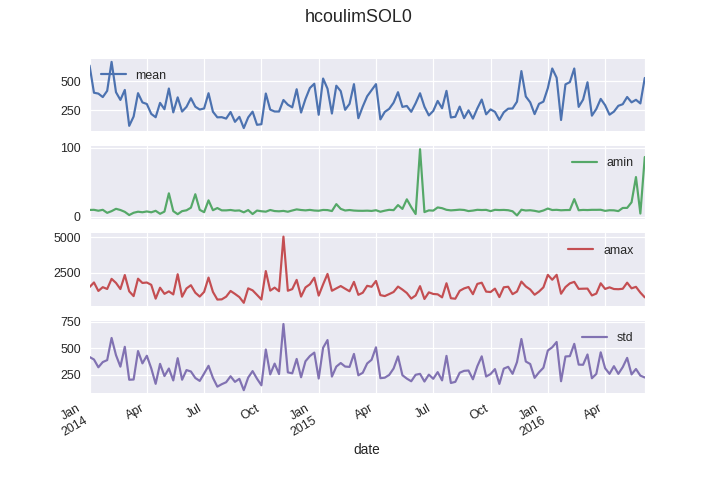

<IPython.core.display.Javascript object>


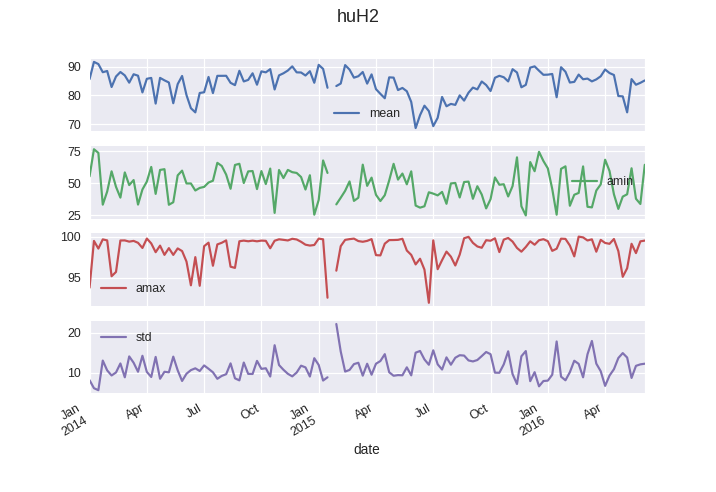

<IPython.core.display.Javascript object>


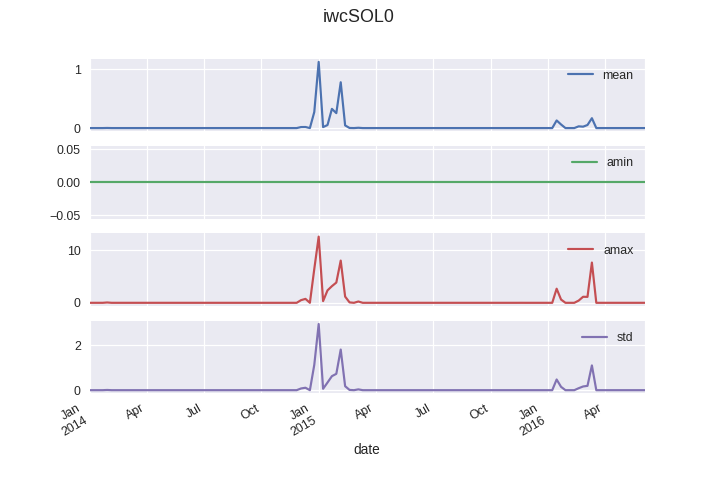

<IPython.core.display.Javascript object>


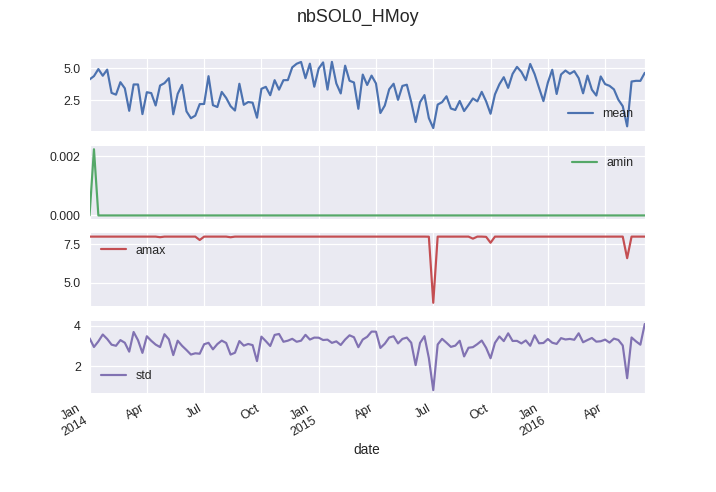

<IPython.core.display.Javascript object>


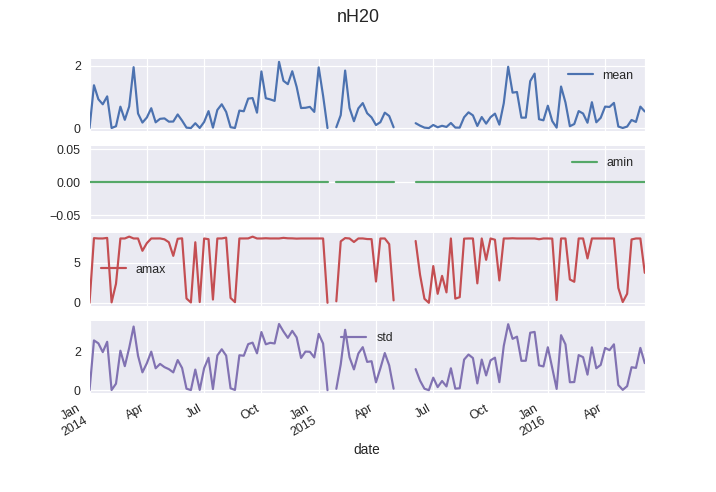

<IPython.core.display.Javascript object>


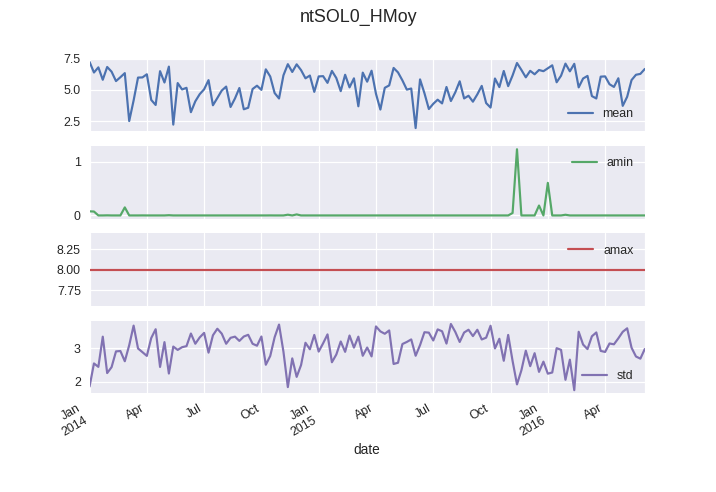

<IPython.core.display.Javascript object>


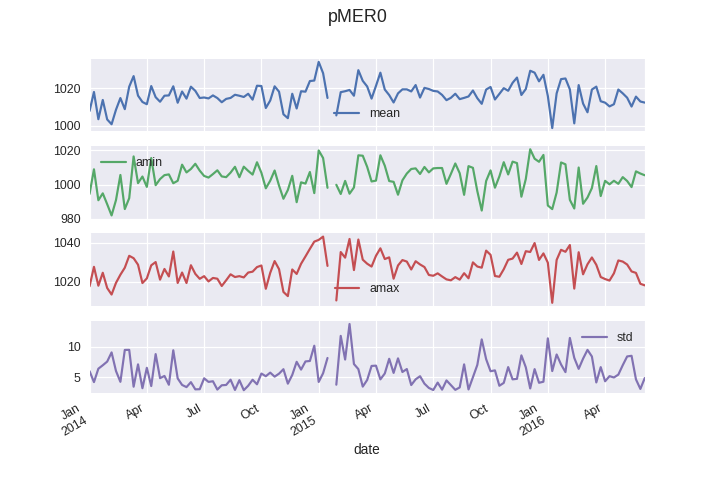

<IPython.core.display.Javascript object>


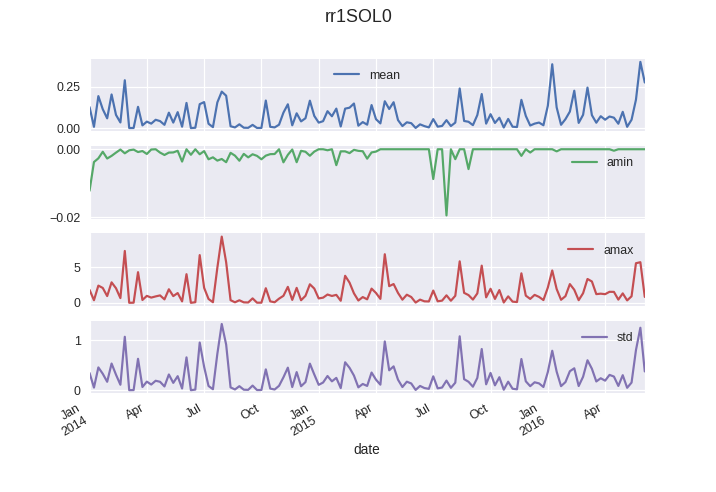

<IPython.core.display.Javascript object>


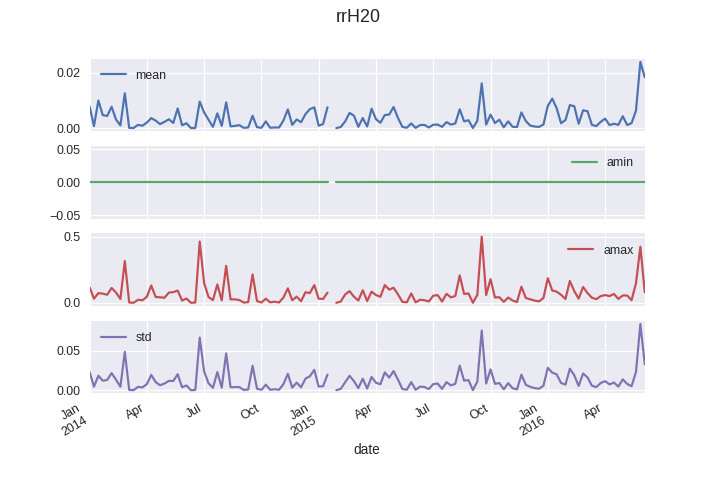

<IPython.core.display.Javascript object>


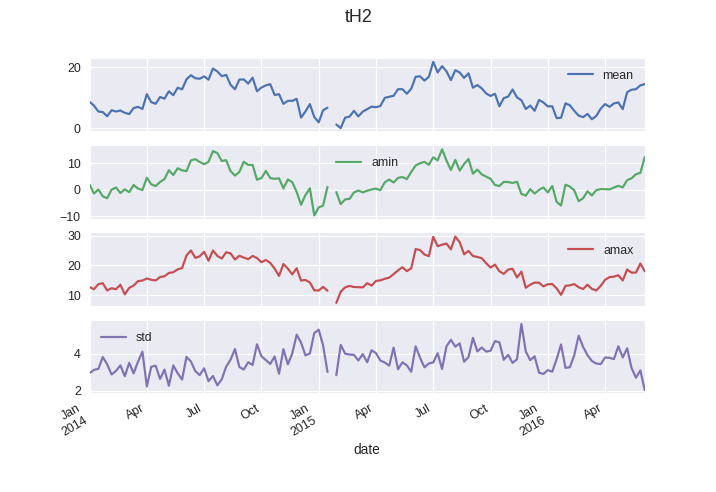

<IPython.core.display.Javascript object>


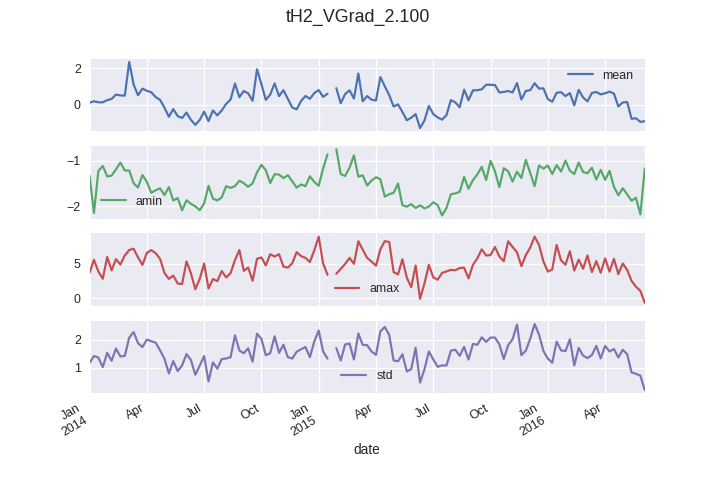

/home/greg/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


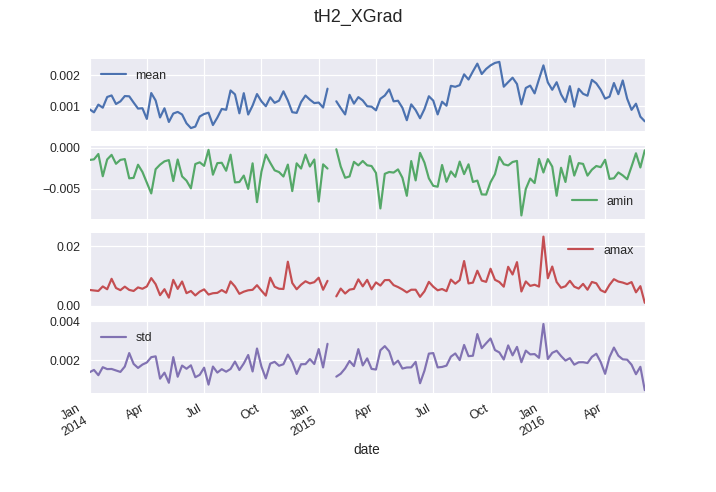

<IPython.core.display.Javascript object>


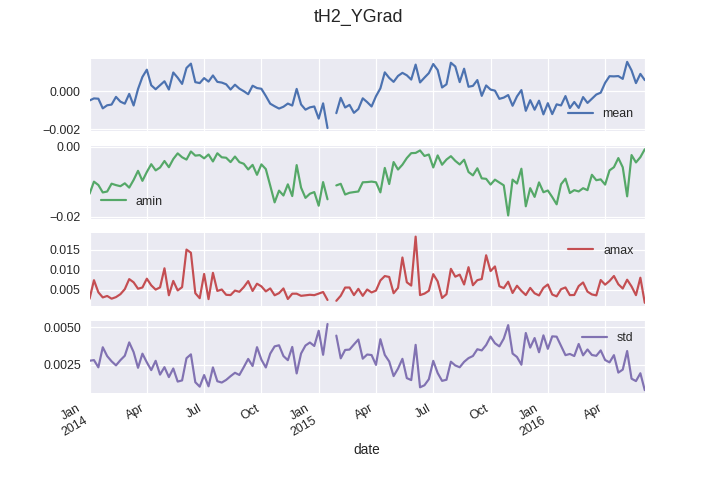

<IPython.core.display.Javascript object>


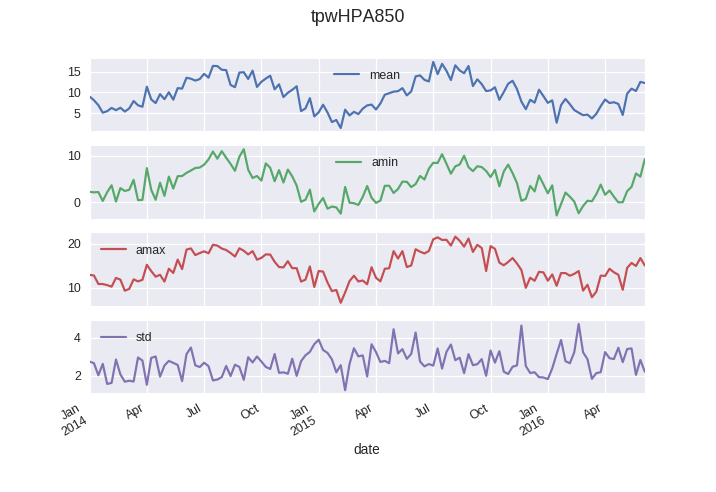

<IPython.core.display.Javascript object>


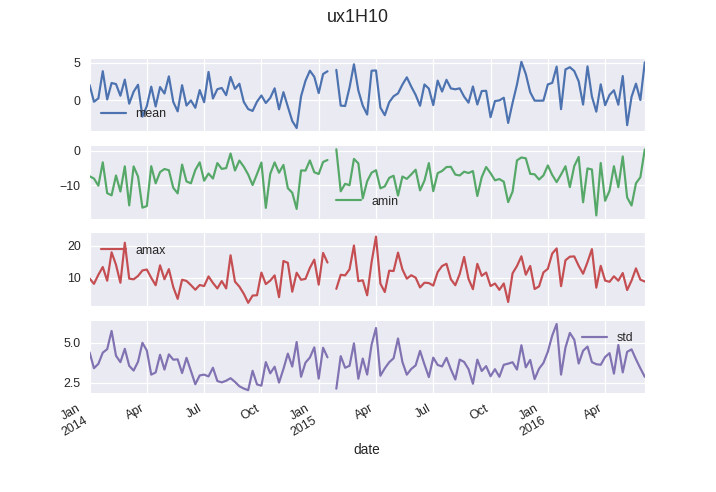

<IPython.core.display.Javascript object>


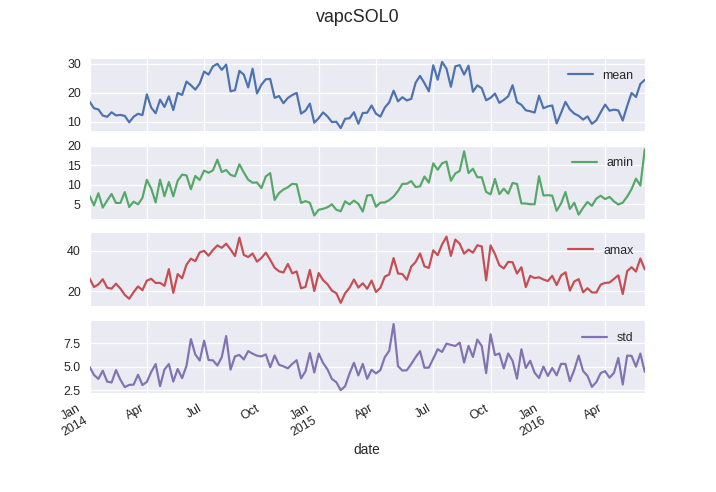

<IPython.core.display.Javascript object>


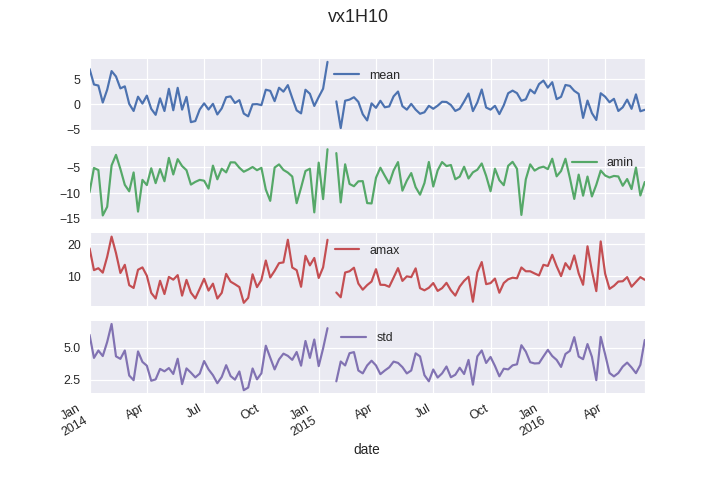

In [13]:
%matplotlib notebook
weekly = pd.DataFrame()
for var in var_used:
    weekly = train[var].resample('W').apply(['mean', np.min, np.max, 'std'])
    weekly.plot(subplots=True, title=var)

In [54]:
weekly_std = pd.DataFrame()
for var in var_used:
    tmp = train[var].resample('W').apply([np.std])
    tmp.rename(index=str, columns={"std": var}, inplace=True)
    weekly_std = pd.concat([weekly_std, tmp], axis=1)
weekly_std.index = pd.DatetimeIndex(weekly_std.index).normalize() # dropping time
weekly_std

,capeinsSOL0,ciwcH20,clwcH20,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10
date,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-05,49.018612,0.000000e+00,2.086157e-08,2.408107,88358.493424,71970.639348,107515.502167,0.000000,415.858492,8.142625,0.000000,3.393538,0.001261,1.862238,6.022722,0.344984,0.023006,2.947981,1.173019,0.001398,0.002770,2.747258,4.407759,4.992634,6.041482
2014-01-12,30.284512,5.645895e-08,7.701922e-05,1.990167,99894.497735,52458.770007,72491.279581,0.000000,392.116783,6.135193,0.000000,2.961939,2.595531,2.552160,4.237082,0.051781,0.004462,3.129127,1.422021,0.001518,0.002815,2.660905,3.400234,4.142381,4.213580
2014-01-19,47.388477,8.151582e-07,8.428221e-05,1.759779,101208.621235,49437.511090,70157.705874,0.000000,318.461549,5.643224,0.000000,3.237556,2.443300,2.450056,6.416737,0.455086,0.018192,3.183673,1.366821,0.001248,0.002332,2.020737,3.677129,3.713212,4.794168
2014-01-26,32.043136,5.896751e-09,4.463885e-05,2.007805,131860.840406,81486.220440,68660.189016,0.000000,367.783141,13.020117,0.000000,3.578153,1.983516,3.349360,6.972375,0.327611,0.011956,3.827888,1.022306,0.001656,0.003671,2.627964,4.380984,4.586602,4.357921
2014-02-02,43.345628,7.045233e-07,7.046556e-05,2.278362,97987.080000,96762.368178,85806.295847,0.000000,386.447439,10.573253,0.009482,3.358488,2.523374,2.265139,7.568786,0.168111,0.012835,3.429305,1.534408,0.001559,0.003080,1.562636,4.600354,3.431435,5.469844
2014-02-09,55.376626,0.000000e+00,7.633131e-08,3.243708,102787.116509,124263.521522,146595.432113,0.000000,596.278936,9.307685,0.000000,3.075474,0.008603,2.441999,9.060730,0.532533,0.021553,2.879479,1.251546,0.001566,0.002732,1.618691,5.753356,3.338324,6.894000
2014-02-16,21.470832,0.000000e+00,2.339384e-06,2.201333,100611.083856,77337.739859,97254.655243,0.000000,433.386808,10.052561,0.000000,3.021431,0.338743,2.911003,6.039489,0.310213,0.013318,3.072061,1.691584,0.001490,0.002463,2.856367,4.188776,4.648489,4.333948
2014-02-23,39.390343,5.699161e-07,6.027508e-05,1.772424,114477.322042,60133.662900,59483.509902,0.000000,324.378703,12.302066,0.000000,3.301999,2.059663,2.921898,4.282558,0.108908,0.004320,3.377067,1.406536,0.001415,0.002810,2.068047,3.781324,3.629047,4.137257
2014-03-02,75.002311,5.029703e-08,3.330450e-05,2.195605,102151.830287,78262.583229,97864.609502,66.227204,512.225002,8.849827,0.000000,3.170882,1.252801,2.617721,9.462961,1.067213,0.048279,2.781707,1.426967,0.001689,0.003106,1.683220,4.626084,2.845943,4.796961


## Analysis per city

### Temp

In [29]:
groupby_city = train.groupby('insee')

<IPython.core.display.Javascript object>


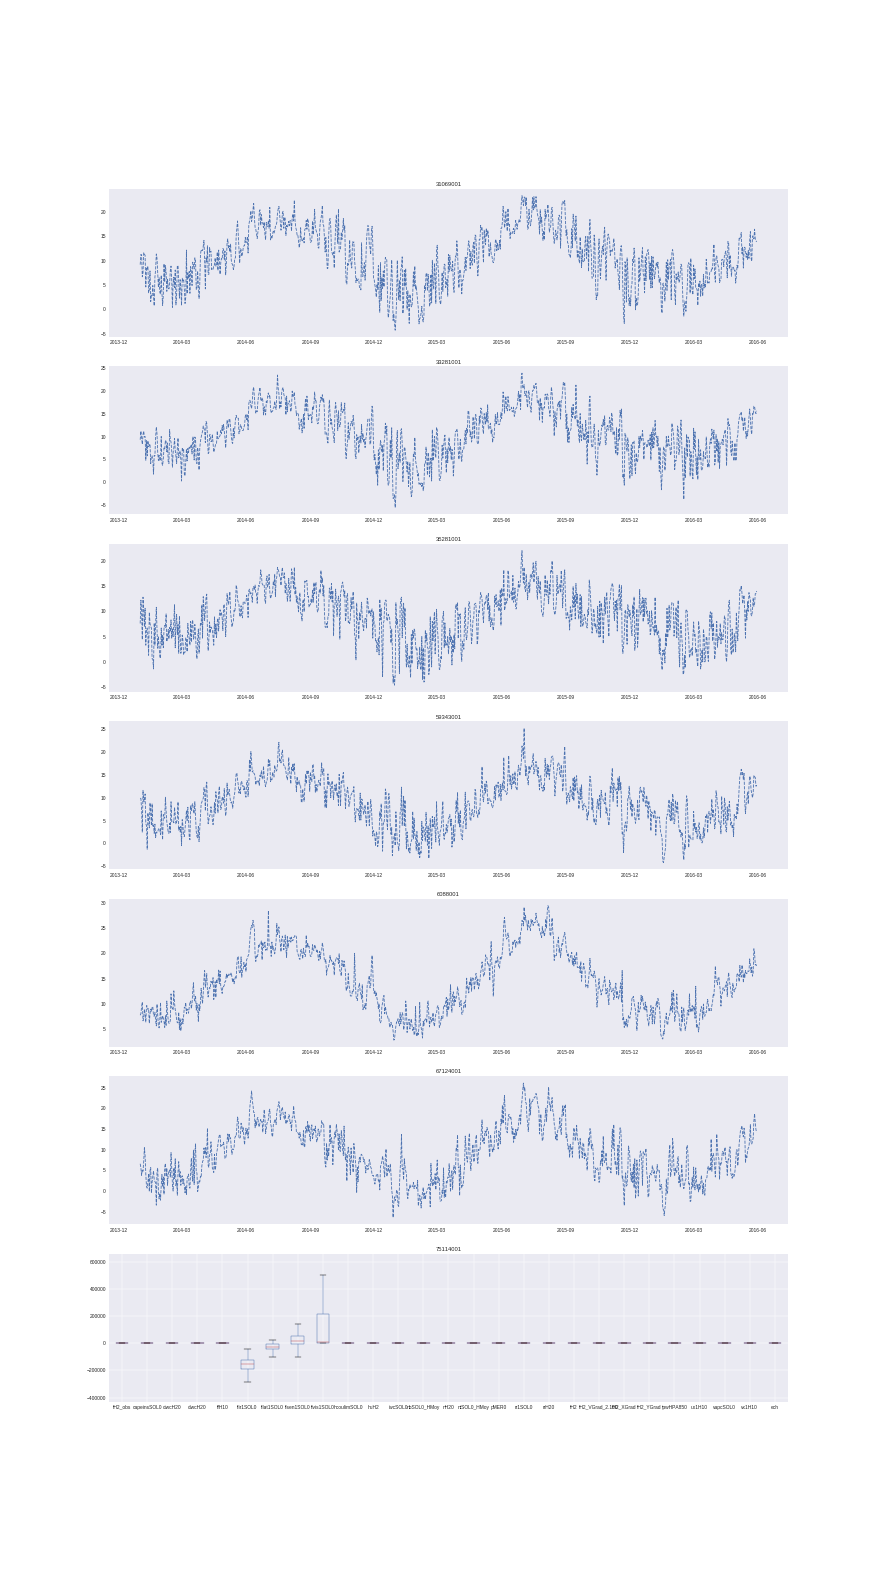

In [30]:
figure = plt.figure(num=None, figsize=(25,45), dpi=35, facecolor='w', edgecolor='k')
nb_row = 7
nb_col = 1
i = 1
for city, vars_ in groupby_city:
    plt.subplot(nb_row, nb_col, i)
    plt.plot(vars_.index, vars_.tH2_obs, '--', label=city)
    i +=1
    plt.title(city)
    plt.grid()
plt.show()

# Draft

**Tout mettre dans 1 fichier**

In [3]:
# from os import listdir
# train_path = data_path + 'train/'
# train = None
# for file_ in listdir(train_path):
#     if 'train' in file_:
#         if train is None:
#             train = pd.read_csv(train_path + file_, header=0, delimiter=";", parse_dates=['date'])
#         else:
#             train = pd.concat([train, pd.read_csv(train_path + file_, header=0, delimiter=";", parse_dates=['date'])])
# train.to_csv(data_path + "train.csv", sep=';', index=False)

In [ ]:
# pickle_file = open(file_path, 'wb')
#     pickle.dump(data, pickle_file, pickle.HIGHEST_PROTOCOL)
#     pickle_file.close()